In [4]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [74]:
# Reading in the dataset and checking the first 5 rows

df = pd.read_csv(r'C:\Users\USER\Downloads\Excel Files\Loan.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
count,136.000000,136.000000,136.000000,136.0,136.0,136.0,136.000000,136.0,136.0,136.0,136.0,136.0,136.0,136.000000,136.000000,136.000000,136.000000
mean,60.410818,33.955619,11.391743,360.0,1.0,1.0,0.610294,1.0,0.0,0.0,0.0,1.0,0.0,0.294118,0.375000,0.330882,0.823529
std,13.822286,24.688472,1.968112,0.0,0.0,0.0,0.489486,0.0,0.0,0.0,0.0,0.0,0.0,0.457330,0.485913,0.472270,0.382629
min,12.247449,0.000000,6.855655,360.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,50.194496,0.000000,10.464143,360.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000
50%,58.240451,43.840548,11.445523,360.0,1.0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000
75%,68.920244,50.924729,12.649111,360.0,1.0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000
max,97.508974,75.000000,16.093477,360.0,1.0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [77]:
# Suming up the null 

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
pd.set_option('display.max_rows', None)

In [79]:
# Checking the percentage of the highest Gender applying for Loan

countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [80]:
# Total Number of each Gender applying

df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [81]:
# Total Number of Married or Single person applying

df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [82]:
# Educational qualification of applicants

df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [83]:
# Mode of emplyment of applicants

df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [84]:
# Credit history of applicants

count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(Loan.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(Loan.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Loan.Credit_History))*100)))

Percentage of Good credit history: 349.26%
Percentage of Bad credit history: 65.44%
Missing values percentage: 36.76%


In [85]:
# Percentage of Loan Status

countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


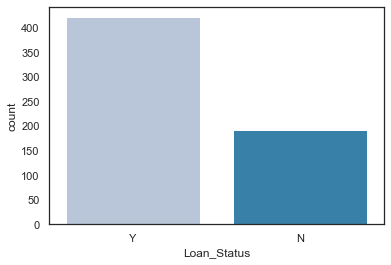

In [63]:
# Visual representation of loan status

sns.countplot(x="Loan_Status", data=Loan, palette="PuBu")
plt.show()

<AxesSubplot:>

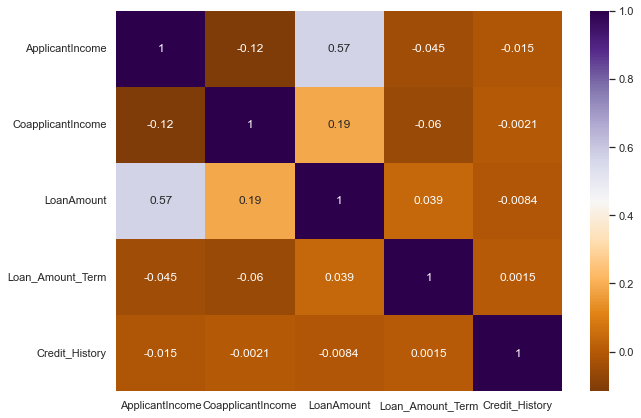

In [65]:
# Using Heatmap to check correlation between Loan Amount and Applicant Income which shows Positive Correlation

plt.figure(figsize=(10,7))
sns.heatmap(Loan.corr(), annot=True, cmap='PuOr')

In [30]:
# Dropping and replacing Missing values

df = df.drop(['Loan_ID'], axis = 1)

In [66]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [67]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [86]:
# Transforming categorical variables

df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [34]:
# Removing outliers 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
# Square Root Transformation to normalized the distribution

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

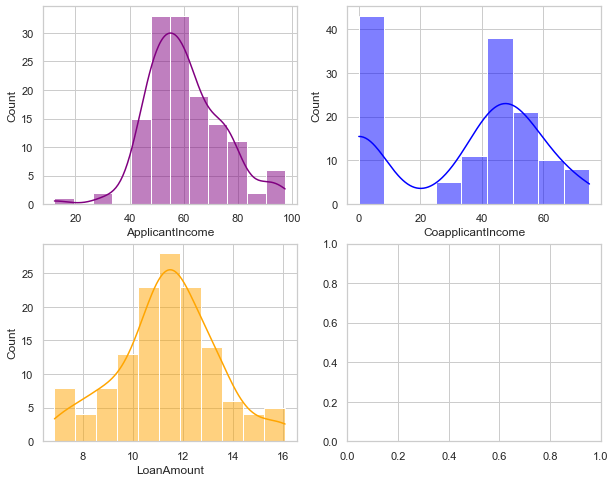

In [38]:
# Visualizing the distribution

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='purple')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='blue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

In [39]:
# Dependent features will be seperated from independent features

X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [40]:
 # Using oversampling technique to avoid overfitting
    
X, y = SMOTE().fit_resample(X, y)

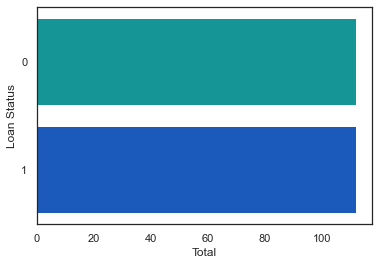

In [44]:
sns.set_theme(style="white")
sns.countplot(y=y, data=df, palette="winter_r")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [45]:
# Data Normalization

X = MinMaxScaler().fit_transform(X)

In [46]:
# Splitting dataset Into 80% train and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
# Using Logistic Regression Model for prediction

LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.82      0.82      0.82        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45

[[19  4]
 [ 4 18]]
LR accuracy: 82.22%


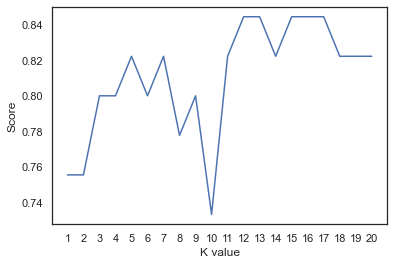

KNN best accuracy: 84.44%


In [48]:
# Using KNeighbors Classifier Model for prediction

scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [49]:
# Using Support Vector Machine Model for prediction

SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.80      0.91      0.85        22

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.84        45
weighted avg       0.85      0.84      0.84        45

[[18  5]
 [ 2 20]]
SVC accuracy: 84.44%


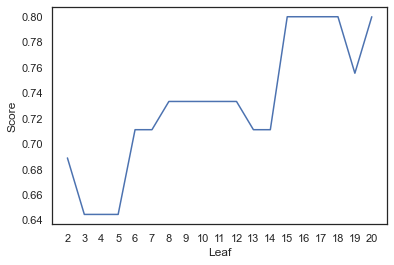

Decision Tree Accuracy: 80.00%


In [50]:
# Using Decision Tree Model for prediction

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

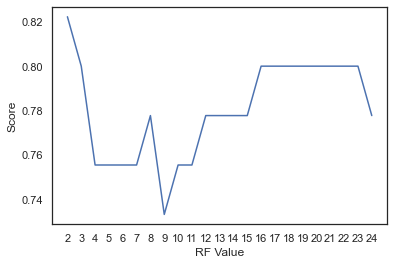

Random Forest Accuracy:  82.22%


In [51]:
# Using Random Forest Model for prediction

scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [52]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 
                                   'Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     DTAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,84.444444
2,SVM,84.444444
0,Logistic Regression,82.222222
4,Random Forest,82.222222
3,Decision Tree,80.000000
